In [1]:
from weaPoints import WeaPoints, WindDataType, CalculationMethod
import numpy as np
import xarray
import pandas

from dask.distributed import Client
#client = Client()
#client

In [ ]:
level = 112
levels = np.array([40,60,80,100,120,140,170,200,250,300])


def nth_nearest_1D (array, value, n):
    closesed = list()
    diff = abs(array - value)

    for i in range(0,n,1):
        arg_nth_min_in_diff = np.where(diff == np.partition(diff, i)[i])
        int_of_nth_value = int(array[arg_nth_min_in_diff][0])
        closesed.append(int_of_nth_value)

    return closesed

nth_nearest_1D(levels, level, 4)

# Loading Points

In [2]:
# size = 200
# lon = np.around(np.random.uniform(6.0, 14.0, size=size),5)
# lat = np.around(np.random.uniform(48.0, 55.0, size=size),5)
# lat_lon_coor = np.stack((lat, lon), axis=1)
# level = np.around(np.random.uniform(120.0, 120.0, size=size),1)

size = 3
lon = np.around(np.linspace(6.0, 14.0, num=size),5)
lat = np.around(np.linspace(48.0, 55.0, num=size),5)
lon, lat = np.meshgrid(lon, lat)
lat_lon_coor = np.stack((lat.flatten(), lon.flatten()), axis=1)
level = np.around(np.random.uniform(120.0, 120.0, size=lat_lon_coor.shape[0]),1)

testPoints = WeaPoints(
    lat_lon_coor = lat_lon_coor,
    level = level,
    wea_types = ["WEA_beispiel"] * lat_lon_coor.shape[0],
    #interpolation_method = [InterpolationMethod.LINEAR] * lat_lon_coor.shape[0],
    _interpolated_power_curves = True,
)

testPoints.point_list[:5]

[_WeaPoint(lat_lon_coor=array([48.,  6.]), level=120.0, wea_type='WEA_beispiel', x_y_coor=[-352079.21479721257, -310032.7289459458], EinheitMastrNummer=None, Hauptwindrichtung=None, mittlere_windgeschw_Hauptwindrichtung=None),
 _WeaPoint(lat_lon_coor=array([48., 10.]), level=120.0, wea_type='WEA_beispiel', x_y_coor=[-54751.78585625449, -321076.8071013912], EinheitMastrNummer=None, Hauptwindrichtung=None, mittlere_windgeschw_Hauptwindrichtung=None),
 _WeaPoint(lat_lon_coor=array([48., 14.]), level=120.0, wea_type='WEA_beispiel', x_y_coor=[242736.91888858782, -315973.65002158046], EinheitMastrNummer=None, Hauptwindrichtung=None, mittlere_windgeschw_Hauptwindrichtung=None),
 _WeaPoint(lat_lon_coor=array([51.5,  6. ]), level=120.0, wea_type='WEA_beispiel', x_y_coor=[-327112.92078553507, 77907.75258832717], EinheitMastrNummer=None, Hauptwindrichtung=None, mittlere_windgeschw_Hauptwindrichtung=None),
 _WeaPoint(lat_lon_coor=array([51.5, 10. ]), level=120.0, wea_type='WEA_beispiel', x_y_coor=

# Get Time series

### 15 min TSnetCDF

Passed time_frame valid.
TSnetCDF data loaded.
Time period loaded.
Windpower turbine 1 complete
Windpower turbine 2 complete
Windpower turbine 3 complete
Windpower turbine 4 complete
Windpower turbine 5 complete
Windpower turbine 6 complete
Windpower turbine 7 complete
Windpower turbine 8 complete
Windpower turbine 9 complete


<AxesSubplot:>

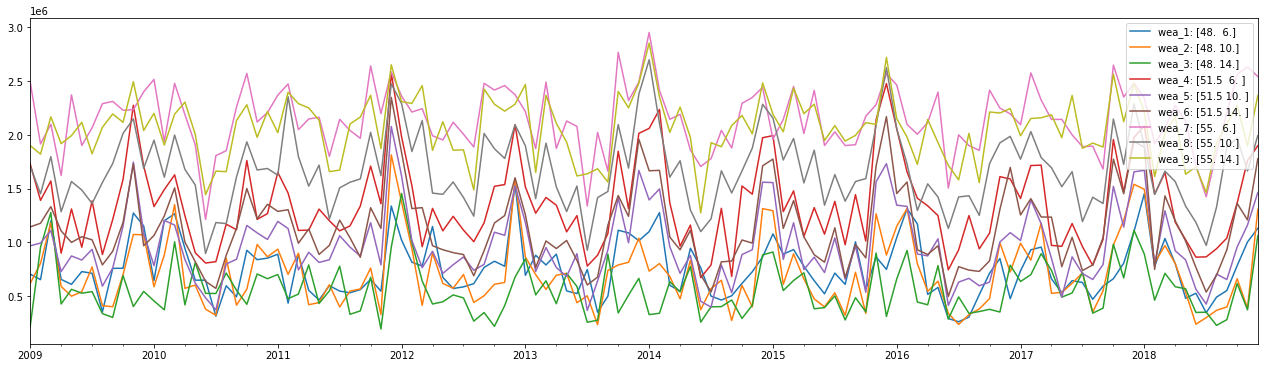

In [3]:
testPoints.get_windpower_out(wind_data_type=WindDataType.TSNETCDF, time_frame=[2009,"2018-12-31"])
testPoints.calculate_Hauptwindrichtung()

Eout = {}
for num, point in enumerate(testPoints.point_list):
    Eout[f"wea_{num+1}: {point.lat_lon_coor}"] = point.power_time_series

df = pandas.DataFrame(data=Eout,index=testPoints.time_periode)

df.resample("1m").sum().plot(figsize=(22,6))

In [ ]:
ax = df.iloc[:,0].resample("1h").sum().rolling("30d").mean().plot(figsize=(22,6))

ax.set_ylabel("stündlicher Bruttoertrag [kW]")

In [ ]:
testPoints.point_list[5].mittlere_windgeschw_Hauptwindrichtung

In [ ]:
df.sum(axis=0).plot.bar(figsize=(22,6))

In [ ]:
# df.to_xarray().to_netcdf("TSgrid_50x50_15min_10a.nc")

In [ ]:
df_3km_mean = xarray.open_dataset("/home/eouser/Documents/code/Windatlas/windatlas/anemos_data/TSgrid_50x50_15min_10a.nc").to_pandas()
df_3km_mean.head()

### 90m Mean

In [ ]:
testPoints.get_windpower_out(wind_data_type=WindDataType.MEAN90M)
Eout = {}
for num, point in enumerate(testPoints.point_list):
    Eout[f"wea_{num+1}: {point.lat_lon_coor}"] = point.power_time_series

df_90mean = pandas.DataFrame(data=Eout,index=testPoints.time_periode)
df_90mean.head()#.resample("14d").mean().plot(figsize=(22,6))

ax = df_90mean.transpose().plot.bar(figsize=(22,6))
ax.set_ylabel("10-Jahresertrag [MWh]")

In [ ]:
# df_90mean.to_xarray().to_netcdf("TSgrid_50x50_90m_10a.nc")

In [ ]:
df_90m_mean = xarray.open_dataset("/home/eouser/Documents/code/Windatlas/windatlas/anemos_data/TSgrid_50x50_90m_10a.nc").to_pandas()
df_90m_mean.head()

### 3km Mean 10a

In [ ]:
# testPoints.get_windpower_out(wind_data_type=WindDataType.MEAN3KM, calculation_method=CalculationMethod.WEIBULL)
# Eout = {}
# for num, point in enumerate(testPoints.point_list):
#     Eout[f"wea_{num+1}: {point.lat_lon_coor}"] = point.power_time_series

# df_90mean = pandas.DataFrame(data=Eout,index=testPoints.time_periode)
# df_90mean.head()#.resample("14d").mean().plot(figsize=(22,6))

# df_90mean.transpose().plot.bar(figsize=(22,6))

### Comparison

In [ ]:
from datetime import datetime

comp = df_90m_mean.transpose()
comp["15min"] = df_3km_mean.sum(axis=0)
comp.columns = [i.strftime('%Y-%m-%d') if isinstance(i, datetime) else i for i in comp.columns]
comp = comp.rename(columns={comp.columns[0]:"wiebull_90m"})
comp = comp / 1000000000 # Wh zu TWh umrechnen
comp["diff"] = comp["15min"] - comp["wiebull_90m"]
comp["diff_rel"] = ((comp["15min"] - comp["wiebull_90m"]) / comp["wiebull_90m"]) * 100 

# Zeilen nach Breitengrad sortieren
#points = [point.lat_lon_coor for point in testPoints.point_list]
#comp["lat"] = [point[0] for point in points]
#comp = comp.sort_values(by='lat', ascending=False)

ax = comp["diff_rel"].plot.bar(figsize=(18,5))
ax.set_ylabel("Unterschied im 10-Jahresertrag [%]")#("10-Jahresertrag in TWh")

In [ ]:
comp.head()

In [ ]:
import geopandas
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as cx
import seaborn as sns

In [ ]:
points = [point.lat_lon_coor for point in testPoints.point_list]
lat = [point[0] for point in points]
lon = [point[1] for point in points]

geodf = geopandas.GeoDataFrame(
    comp, geometry=geopandas.points_from_xy(lon, lat))

geodf["y"] = geodf.geometry.y
geodf["x"] = geodf.geometry.x

geodf = geodf.sort_values(by='y', ascending=False)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))
fig.suptitle(f"Relative-Differenz der Energieerträge von {lat_lon_coor.shape[0]} gleichen, zufällig platzierten Beispiel-Windkraftanlagen mit 120m Nabenhöhe \n zwischen 15min-3km-Daten und 10a-90m-Daten von 2009 bis 2018 \n Diff.>10% = {geodf.loc[abs(geodf['diff_rel']) > 10,:].shape[0] / geodf.shape[0]}, Diff.>25% = {geodf.loc[abs(geodf['diff_rel']) > 25,:].shape[0] / geodf.shape[0]}", fontsize=16)

# SCATTER
sns.kdeplot(ax=ax[0], x=geodf["diff_rel"], y=geodf["y"], cmap="Greys", fill=True)
geodf.plot(kind="scatter", x="diff_rel", y="y", ax=ax[0], c=geodf["diff_rel"], cmap='plasma', alpha=.8, s=8)
ax[0].collections[-1].colorbar.set_label("Differenz Energieertrag [%]")
y_limit = ax[0].get_ylim()
ax[0].plot([0,0],[geodf["y"].min()-5,geodf["y"].max()+5], linestyle="--", color="k", linewidth=1)
ax[0].plot([25,25],[geodf["y"].min()-5,geodf["y"].max()+5], linestyle="--", color="gray", linewidth=1)
ax[0].plot([-25,-25],[geodf["y"].min()-5,geodf["y"].max()+5], linestyle="--", color="gray", linewidth=1)
ax[0].plot([10,10],[geodf["y"].min()-5,geodf["y"].max()+5], linestyle="--", color="gray", linewidth=1)
ax[0].plot([-10,-10],[geodf["y"].min()-5,geodf["y"].max()+5], linestyle="--", color="gray", linewidth=1)
ax[0].set_ylim((47.65, 55.35))
ax[0].set_ylabel("Breitengrad")
ax[0].set_xlabel("Differenz Energieertrag [%]")

# MAP
geodf.crs = "EPSG:4326"
geodf = geodf.to_crs(epsg=3857)
geodf.plot(column='diff_rel', ax=ax[1], cmap='plasma', s=8, alpha=.8)#, cax=cax)
cx.add_basemap(ax[1], source=cx.providers.CartoDB.Voyager)#, crs=geodf.crs)
ax[1].set_xticks([])
ax[1].set_yticks([])

fig.savefig("/home/eouser/Documents/code/Windatlas/Diff2500Anlagen.eps", format="eps")
fig.savefig("/home/eouser/Documents/code/Windatlas/Diff2500Anlagen.png", format="png")

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))
fig.suptitle(f"Differenz der Energieerträge von {lat_lon_coor.shape[0]} gleichen, zufällig plazierten Beispiel-Windkraftanlagen mit 120m Nabenhöhe \n zwischen 15min-3km-Daten und 10a-90m-Daten von 2009 bis 2018 in Terrawattstunden", fontsize=16)

#HEXAPLOT
sns.kdeplot(ax=ax[0], x=geodf["diff_rel"], y=geodf["y"], fill=True)

#MAP
#geodf.crs = "EPSG:4326"
#geodf = geodf.to_crs(epsg=3857)

geodf.plot(column='diff_rel', ax=ax[1], cmap='plasma', s=8, alpha=.9)#, cax=cax)
#cx.add_basemap(ax[1], source=cx.providers.CartoDB.Voyager)#, crs=geodf.crs)
ax[1].set_xticks([])
ax[1].set_yticks([])

#fig.savefig("/home/eouser/Documents/code/Windatlas/Diff150Anlagen.eps", format="eps")
#fig.savefig("/home/eouser/Documents/code/Windatlas/Diff150Anlagen.png", format="png")

### 3km man

In [ ]:
path = "/uba/anemos_winddata/20191029_anemosDataFull/UBA-Windatlas/Statistics/10-Jahresmittel/histos.120m.2009-2018.nc"

xarray.open_dataset(path).interp(x=12.3,y=30.34).wbk

In [ ]:
path = "/uba/anemos_winddata/20191029_anemosDataFull/UBA-Windatlas/3arcsecs/D-3km.E5.3arcsecs.wbk.2009-2018.nc"

xarray.open_dataset(path, engine="h5netcdf").interp(x=6.27371826,y=47.94883789, level=120).wbk